<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C2/C2.html"><img src="../data/C2_nav.png" width="100"  style="float:right;" alt="C2"></a>
<h1> STFT: Influence of Window Function</h1> 
</div>

<br/>

<p>
The STFT depends on both the signal as well as the window function, although one is typically interested only in the signal's properties. The design of suitable window functions and their influence is a science by itself. Following Section 2.5 of  <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>, we discuss some examples that illustrate how the window may affect the spectral estimate computed by the STFT.
</p> 

## Window Type

The seemingly simplest way to obtain a local view on the signal to be analyzed is to leave it unaltered within the desired section and to set all values to zero outside the section. Such a localization is realized by a **rectangular window**. However, using the rectangular window has major drawbacks, since it generally leads to discontinuities at the section's boundaries. Such abrupt changes lead to artifacts due to interferences which are spread over the entire frequency spectrum. Rather than being part of the original signal, these frequency components come from the properties of the rectangular window.

To attenuate the boundary effects, one often uses windows that are nonnegative within the desired section and continuously fall to zero towards the section's boundaries. One such example is the **triangular window**, which leads to much smaller ripple artifacts. A window often used in signal processing is the **Hann window** (named after the meteorologist Julius von Hann, 1839&ndash;1921). The Hann window is a raised cosine window, dropping smoothly to zero at the section boundaries. This softens the artifacts in the Fourier transform of the windowed signal. However, on the downside, the Hann window introduces some smearing of frequencies. As a result, the Fourier transform of a signal's windowed section may look smoother than the signal's properties suggest. In other words, the reduction of ripple artifacts introduced by the window is achieved at the expense of a poorer spectral localization. 

<!-- <img src="../data/C2/FMP_C2_F29.png" width="500px" align="middle" alt="C0"> -->
<!-- <img src="../data/C2/FMP_C2_F30.png" width="500px" align="middle" alt="C0"> -->

In the following code cells, we illustrate the effect of the window type using a chirp signal as example.

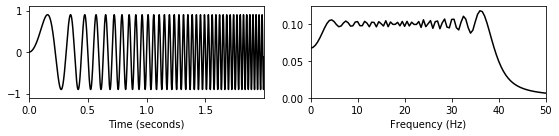

In [1]:
import numpy as np
import scipy
from  matplotlib import pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

%matplotlib inline

duration = 2.0
Fs = 2000
omega = 10
N = int(duration * Fs)
t = np.arange(N) / Fs
x = 0.9 * np.sin(2 * np.pi * omega * t * t)

plt.figure(figsize=(8, 2))

plt.subplot(1, 2, 1)
plt.plot(t, x, c='k')
plt.xlim([t[0], t[-1]])
plt.ylim([-1.1, 1.1])
plt.xlabel('Time (seconds)')

plt.subplot(1, 2, 2)
X = np.abs(np.fft.fft(x)) / N * 2
freq = np.fft.fftfreq(N, d=1/Fs)
X = X[:N//2]
freq = freq[:N//2]
plt.plot(freq, X, c='k')
plt.xlim([0, 50])
plt.ylim(bottom=0)
plt.xlabel('Frequency (Hz)');
plt.tight_layout()

Rectangular window:


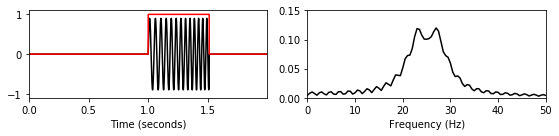

Triangular window:


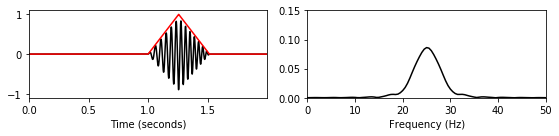

Hann window:


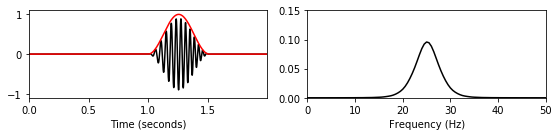

In [2]:
def windowed_ft(t, x, Fs, w_pos_sec, w_len, w_type, upper_y=1.0):
    
    N = len(x)
    w_pos = int(Fs * w_pos_sec)
    w = np.zeros(N)
    w[w_pos:w_pos + w_len] = scipy.signal.get_window(w_type, w_len)
    x = x * w
    
    plt.figure(figsize=(8, 2))

    plt.subplot(1, 2, 1)
    plt.plot(t, x, c='k')
    plt.plot(t, w, c='r')
    plt.xlim([min(t), max(t)])
    plt.ylim([-1.1, 1.1])
    plt.xlabel('Time (seconds)')

    plt.subplot(1, 2, 2)
    X = np.abs(np.fft.fft(x)) / N * 2
    freq = np.fft.fftfreq(N, d=1/Fs)
    X = X[:N//2]
    freq = freq[:N//2]
    plt.plot(freq, X, c='k')
    plt.xlim([0, 50])
    plt.ylim([0, upper_y])
    plt.xlabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()
    
w_len = 1024
w_pos = 1280
print('Rectangular window:')
windowed_ft(t, x, Fs, 1.0, w_len, 'boxcar', upper_y=0.15)
print('Triangular window:')
windowed_ft(t, x, Fs, 1.0, w_len, 'triang', upper_y=0.15)
print('Hann window:')
windowed_ft(t, x, Fs, 1.0, w_len, 'hann', upper_y=0.15)

## Spectrogram: Effect of Window Type

In the next example, we consider a chirp signal $f$ that is in the audible frequency range. In the continuous-time domain, the signal is defined by 

$$
f(t)=\sin(400\pi t^2) \mathrm{\quad for \quad } t\in[0,1],
$$

which smoothly fades out towards $t=1$. For this chirp, the instantaneous frequency linearly raises from $\omega = 0~\mathrm{Hz}$ at $t=0$ to $\omega = 400~\mathrm{Hz}$ at $t=1$. 

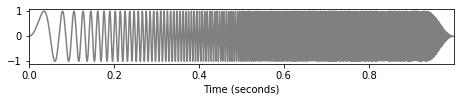

In [3]:
duration = 1.0
Fs = 4000
N = int(duration * Fs)
t = np.arange(0, N) / Fs
x = np.sin(np.pi * 400 * t * t)

size_fade = 256
w_fade = np.hanning(size_fade * 2)[size_fade:]
x[-size_fade:] *= w_fade

ipd.display(ipd.Audio(x, rate=Fs))

plt.figure(figsize=(6.5, 1.5))
plt.plot(t, x, c='gray')
plt.xlabel('Time (seconds)')
plt.xlim( [t[0], t[-1]] );
plt.tight_layout()

For computing the STFT, we use a Hann as well as a rectangular window each having a size of $62.5$ msec. The following figure shows the resulting spectrograms. The images of the spectrograms show a strong diagonal stripe, which reveals the linear frequency increase of the chirp signal. Note that the windows introduce some smearing of frequencies in the Fourier domain as well as additional artifacts, which explain the weaker diagonal stripes that run below and above the strong diagonal stripe. These weaker stripes correspond to the ripples occurring in the Fourier transform of the window function. One can observe that the ripple artifacts are stronger when using a rectangular window instead of a Hann window. In general, it is not easy to distinguish the characteristics of the signal and the effects introduced by the window function.

<!-- <img src="../data/C2/FMP_C2_F31.png" width="500px" align="middle" alt="C0"> -->

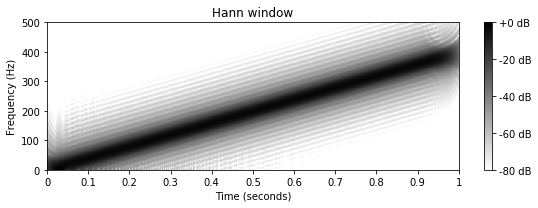

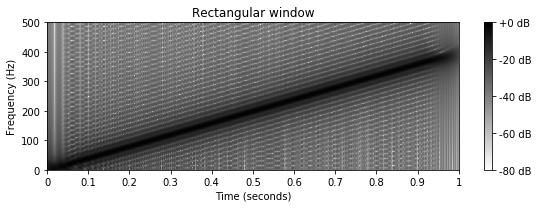

In [4]:
w_len_ms = 62.5
N = int((w_len_ms / 1000) * Fs)
H = 4
X_hann = librosa.stft(x, n_fft=N*16, hop_length=H, win_length=N, window='hann', center=True, pad_mode='constant')
X_rect = librosa.stft(x, n_fft=N*16, hop_length=H, win_length=N, window='boxcar', center=True, pad_mode='constant')

plt.figure(figsize=(8, 3))
librosa.display.specshow(librosa.amplitude_to_db( np.abs(X_hann), ref=np.max), 
                         y_axis='linear', x_axis='time', sr=Fs, hop_length=H, cmap='gray_r')
plt.clim([-80, 0])
plt.ylim([0, 500])
plt.xlim([0, 1])
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.title('Hann window')
plt.tight_layout()

plt.figure(figsize=(8, 3))
librosa.display.specshow(librosa.amplitude_to_db( np.abs(X_rect), ref=np.max), 
                         y_axis='linear', x_axis='time', sr=Fs, hop_length=H, cmap='gray_r')
plt.clim([-80, 0])
plt.ylim([0, 500])
plt.xlim([0, 1])
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.title('Rectangular window')
plt.tight_layout()

## Spectrogram: Effect of Window Size

Besides the window type, the size of the window also crucially affects the STFT. With the next example, we discuss the role of the size of the window function. Let us consider a signal $f$ defined by 

\begin{equation}
   f(t)=\sin (800\pi t)+\sin (900\pi t) + \delta(t-0.45) + \delta(t-0.5) \mathrm{\quad for \quad } t\in[0,1].
\end{equation}

In this interval, $f$ is a superposition of two sinusoids of frequency $400$ and $450~\mathrm{Hz}$, respectively. Furthermore, two impulses are added at the points $t=0.45$ and $t=0.5$ sec. We assume that $f$ is zero outside the shown interval $[0,1]$. 

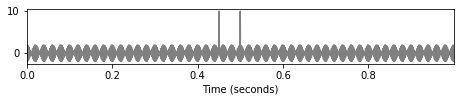

In [5]:
duration = 1.0
Fs = 4000
N = int(duration * Fs)
t = np.arange(N) / Fs
x = np.sin(2 * np.pi * 400 * t) + np.sin(2 * np.pi * 450 * t)
x[int(round(0.45 * Fs))] = 10
x[int(round(0.50 * Fs))] = 10

ipd.display(ipd.Audio(x, rate=Fs))

plt.figure(figsize=(6.5, 1.5))
plt.plot(t, x, c='gray')
plt.xlabel('Time (seconds)')
plt.xlim( [t[0], t[-1]] )
plt.tight_layout()

To compute the spectrogram, we use Hann windows of different sizes. Using a size of $32$ msec, one can observe in the spectrogram a horizontal stripe in the region between $375$ and $475~\mathrm{Hz}$, which corresponds to the sinusoids, as well as two vertical stripes at $t=0.45$ and $t=0.5~\sec$, which correspond to the impulses. While the two impulses can be clearly separated (in each of the $32$ msec windows there is at most one of the impulses), the two frequency components at $\omega=400~\mathrm{Hz}$ and $\omega=450~\mathrm{Hz}$ are not separated well (due to frequency smearing introduced by the chosen window).

<!--<img src="../data/C2/FMP_C2_F32.png" width="500px" align="middle" alt="C0">-->

The situation changes when increasing the window size. For example, using a Hann window of size $128$ msec results in
a clear separation of the two frequency components as shown by the two horizontal stripes. However, increasing the window size goes along with an increased smearing in the time domain. As a result, the two impulses are not separated any longer. As a side remark, we want to point to the two vertical stripes showing up at $t=0$ and $t=1$, which are the result of the zero-padding outside the shown time interval.

/home/swpffm/miniconda3/envs/FMP/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=8192 is too small for input signal of length=4000
  n_fft, y.shape[-1]


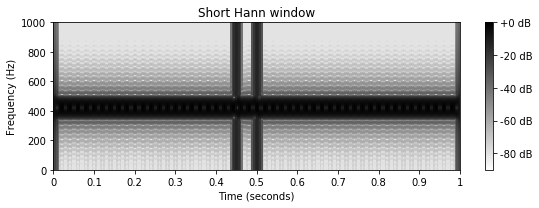

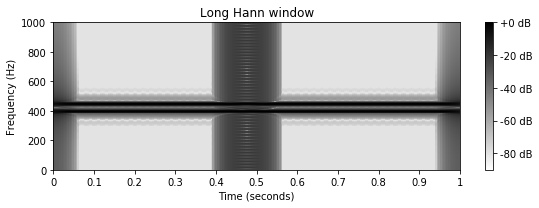

In [6]:
w_len_ms = 32
N = int((w_len_ms / 1000) * Fs)
H = 16
X_short = librosa.stft(x, n_fft=N*16, hop_length=H, win_length=N, window='hann', center=True, pad_mode='constant')

w_len_ms = 128
N = int((w_len_ms / 1000) * Fs)
H = 16
X_long = librosa.stft(x, n_fft=N*16, hop_length=H, win_length=N, window='hann', center=True, pad_mode='constant')

plt.figure(figsize=(8, 3))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(X_short), ref=np.max), 
                         y_axis='linear', x_axis='time', sr=Fs, hop_length=H, cmap='gray_r')
plt.clim([-90, 0])
plt.ylim([0, 1000])
plt.xlim([0, 1])
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.title('Short Hann window')
plt.tight_layout()

plt.figure(figsize=(8, 3))
librosa.display.specshow(librosa.amplitude_to_db( np.abs(X_long), ref=np.max), 
                         y_axis='linear', x_axis='time', sr=Fs, hop_length=H, cmap='gray_r')
plt.clim([-90, 0])
plt.ylim([0, 1000])
plt.xlim([0, 1])
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.title('Long Hann window')
plt.tight_layout()

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a> and  <a href="https://www.audiolabs-erlangen.de/fau/assistant/zalkow">Frank Zalkow</a>.
</div>  

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>